In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv('shoes_data2.csv.csv')

In [11]:
X = df[['price', 'availability']].values
def normalize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    return (X - means) / stds, means, stds

X_normalized, means, stds = normalize_features(X)

# Adding an intercept term (column of ones) after normalization
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]


In [12]:
X = df['price'].values
theta = np.zeros(X_normalized.shape[1])
y = df['weight'].values
# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Calculate the cost using the current theta
cost = compute_cost(X_normalized, y, theta)
print("Cost:", cost)

Cost: nan


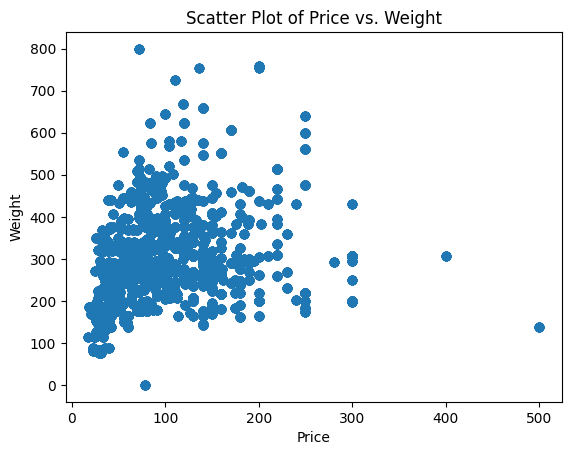

In [13]:
filtered_data = df[df['weight'] < 1000]  # Filter the DataFrame

# Create a scatter plot of price vs. weight
plt.scatter(filtered_data['price'], filtered_data['weight'])  # Make sure column names are correct
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Scatter Plot of Price vs. Weight')
plt.show()

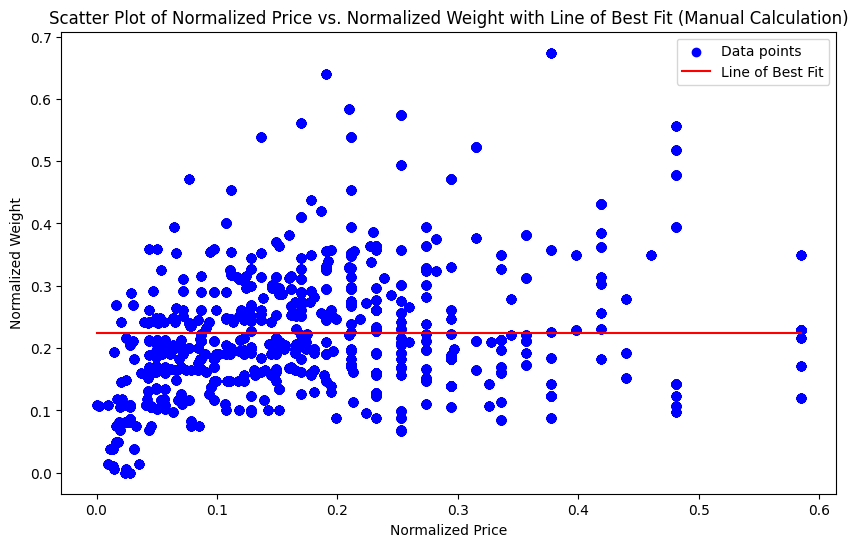

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Normalize first
df['price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())

# Filter after normalizing
filtered_df = df[(df['weight'] < 1) & (df['price'] < 1)]

X = filtered_df['price'].values.reshape(-1, 1)  # Reshape for sklearn
y = filtered_df['weight'].values  # Target variable from the same filtered DataFrame

# Manual calculation of linear regression parameters
x_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)

beta_1 = numerator / denominator
beta_0 = y_mean - beta_1 * x_mean

# Generate fit line
X_fit = np.linspace(X.min(), X.max(), 100)
y_fit = beta_0 + beta_1 * X_fit

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_fit, y_fit, color='red', label='Line of Best Fit')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Weight')
plt.title('Scatter Plot of Normalized Price vs. Normalized Weight with Line of Best Fit (Manual Calculation)')
plt.legend()
plt.show()


Cost at iteration 0: 0.0005617858266281365
Cost at iteration 100: 0.0004730549753926671
Cost at iteration 200: 0.00040040667226253065
Cost at iteration 300: 0.0003409257188354801
Cost at iteration 400: 0.0002922253773335072
Cost at iteration 500: 0.0002523515658934562
Cost at iteration 600: 0.00021970442344364154
Cost at iteration 700: 0.00019297409482787935
Cost at iteration 800: 0.0001710881578902938
Cost at iteration 900: 0.0001531685817344302
Final trained parameters: [ 0.01967876  0.00190898 -0.0007237 ]


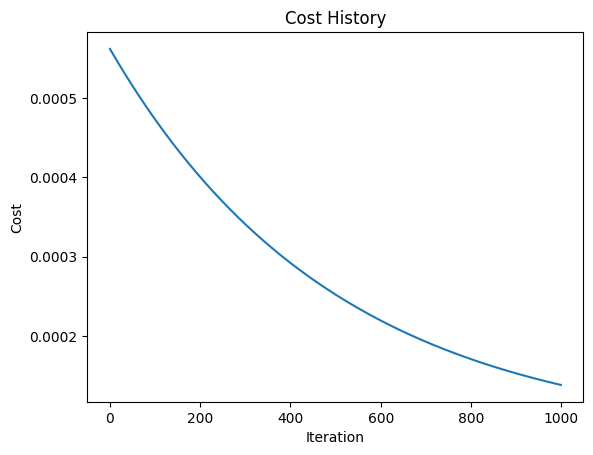

In [ ]:
if df.isnull().any().any() or (df.select_dtypes(include=[np.number]).apply(np.isinf).any().any()):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

# Normalize the features
scaler = StandardScaler()
features = ['price', 'availability']
X = df[features].values
y = df['weight'].values

X_normalized = scaler.fit_transform(X)

# Add a column of ones to X for the bias term (intercept)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize parameters (theta) to zero
theta = np.zeros(X_normalized.shape[1])

# Set a smaller learning rate and number of iterations
learning_rate = 0.001
num_iterations = 1000

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        
        if np.isnan(cost):
            print(f"NaN detected in cost at iteration {i}, stopping early.")
            break
        
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Cost at iteration {i}: {cost}")

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_normalized, y, theta, learning_rate, num_iterations)

# Final parameters
print("Final trained parameters:", theta)

# Plotting the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [22]:
random_matrix = np.random.rand(2, 1)
augmented_X = np.c_[np.ones(X.shape[0]), X[:, 0]]
print(augmented_X)

[[1.         0.29460581]
 [1.         0.29460581]
 [1.         0.29460581]
 ...
 [1.         0.10788382]
 [1.         0.10788382]
 [1.         0.10788382]]


In [23]:
# Extract theta1 and theta2 from the random matrix
theta1, theta2 = random_matrix.flatten()

# Multiply theta1 by the first column in augmented_X and theta2 by the second column in augmented_X
y = theta1 * augmented_X[:, 0] + theta2 * augmented_X[:, 1]

print(y)

[0.88279455 0.88279455 0.88279455 ... 0.70487718 0.70487718 0.70487718]


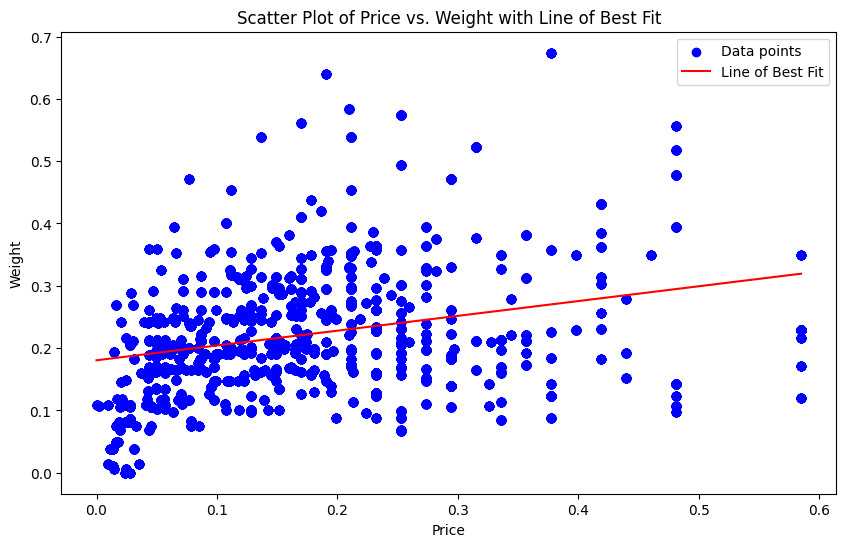

In [26]:
from sklearn.linear_model import LinearRegression

df['price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())

# Filter after normalizing
filtered_df = df[(df['weight'] < 1) & (df['price'] < 1)]

X = filtered_df['price'].values.reshape(-1, 1)  # Reshape for sklearn
y = filtered_df['weight'].values  # Target variable from the same filtered DataFrame


# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)  # Make sure both X and y have the same number of samples

# Make predictions for plotting
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generating points for the line of fit
y_fit = model.predict(X_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['price'], filtered_df['weight'], color='blue', label='Data points')  # Use filtered_df for consistency
plt.plot(X_fit, y_fit, color='red', label='Line of Best Fit')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Scatter Plot of Price vs. Weight with Line of Best Fit')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print("R² value:", r2)

R² value: 0.07617841236354905


In [31]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.009664714882246656
